In [40]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

# Example labels and logits for the loss function (replace with your actual data)
labels = tf.constant([0, 1, 2])  # Replace with actual labels
logits = tf.constant([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])  # Replace with actual logits

# Define the loss function
loss = tf.compat.v1.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)


In [41]:
train_data= ImageDataGenerator(
    rescale= 1./255,
    horizontal_flip= True,
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range= 10
)
train_set=train_data.flow_from_directory(
    "lung/Train",
    target_size= (224, 224),
    batch_size= 32,
    class_mode= 'sparse'
)

Found 3000 images belonging to 3 classes.


In [42]:
val_data= ImageDataGenerator(
    rescale= 1./255,
    horizontal_flip= True,
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range= 10
)
val_set=train_data.flow_from_directory(
    "lung/Val",
    target_size= (224, 224),
    batch_size= 32,
    class_mode= 'sparse'
)

Found 300 images belonging to 3 classes.


In [43]:
est_data= ImageDataGenerator(
    rescale= 1./255,
    horizontal_flip= True,
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range= 10
)
test_set=train_data.flow_from_directory(
    "lung/Test",
    target_size= (224,224),
    batch_size= 32,
    class_mode= 'sparse'
)

Found 1875 images belonging to 3 classes.


In [44]:
for image_batch, label_batch in train_set:
    print(image_batch.shape)
    break

(32, 224, 224, 3)


In [45]:
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']
print(class_names)

['adenocarcinoma', 'benign', 'squamous_carcinoma']


In [46]:
IMAGE_SIZE = [224, 224]

In [47]:
#layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [48]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [49]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [50]:
# tell the model what cost and optimization method to use
model.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [51]:
history= model.fit(
  train_set,
  validation_data=val_set,
  epochs=30,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set)
)

Epoch 1/30
94/94 [==============================] - 1750s 19s/step - loss: 0.3286 - accuracy: 0.8747 - val_loss: 0.1459 - val_accuracy: 0.9467
Epoch 2/30
94/94 [==============================] - 1101s 12s/step - loss: 0.1576 - accuracy: 0.9410 - val_loss: 0.2000 - val_accuracy: 0.9267
Epoch 3/30
94/94 [==============================] - 1044s 11s/step - loss: 0.1126 - accuracy: 0.9577 - val_loss: 0.1532 - val_accuracy: 0.9467
Epoch 4/30
94/94 [==============================] - 1131s 12s/step - loss: 0.1217 - accuracy: 0.9537 - val_loss: 0.2569 - val_accuracy: 0.9067
Epoch 5/30
94/94 [==============================] - 1081s 11s/step - loss: 0.1003 - accuracy: 0.9613 - val_loss: 0.0977 - val_accuracy: 0.9600
Epoch 6/30
94/94 [==============================] - 41039s 441s/step - loss: 0.0701 - accuracy: 0.9750 - val_loss: 0.1379 - val_accuracy: 0.9433
Epoch 7/30
94/94 [==============================] - 2166s 23s/step - loss: 0.0728 - accuracy: 0.9717 - val_loss: 0.1259 - val_accuracy: 0.95

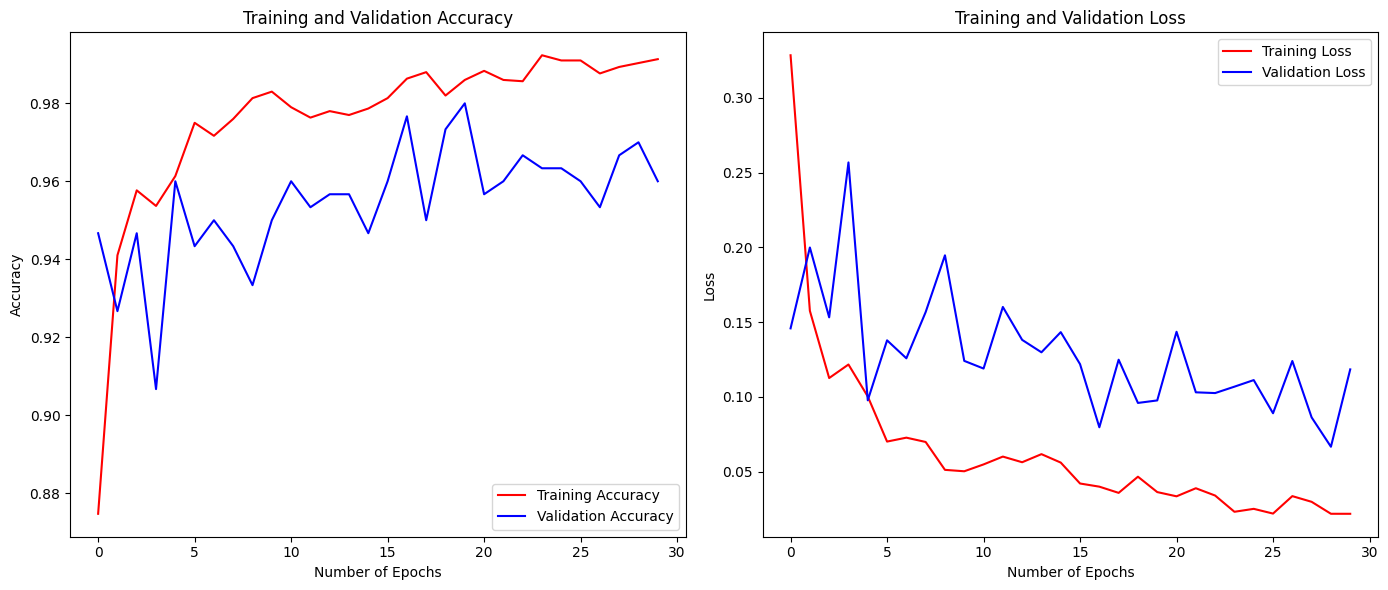

In [92]:
# Number of epochs
epochs = range(len(acc))

# Create a 2x1 grid for the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# First subplot for Training and Validation Accuracy
ax1.plot(epochs, acc, label='Training Accuracy', color='red')
ax1.plot(epochs, val_acc, label='Validation Accuracy', color='blue')
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower right')

# Second subplot for Training and Validation Loss
ax2.plot(epochs, loss, label='Training Loss', color='red')
ax2.plot(epochs, val_loss, label='Validation Loss', color='blue')
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('Acc.png')
plt.show()

94/94 [==============================] - 714s 8s/step - loss: 0.0269 - accuracy: 0.9920


In [54]:
accuracy*100


99.19999837875366

In [55]:
val_loss,val_accuracy=model.evaluate(val_set)
val_accuracy*100

10/10 [==============================] - 74s 7s/step - loss: 0.1079 - accuracy: 0.9600


95.99999785423279

In [56]:
test_loss,test_accuracy=model.evaluate(test_set)
test_accuracy*100

59/59 [==============================] - 449s 8s/step - loss: 0.1021 - accuracy: 0.9653


96.5333342552185

In [57]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to predict
actual label: adenocarcinoma
1/1 [==============================] - 9s 9s/step
predicted label: adenocarcinoma


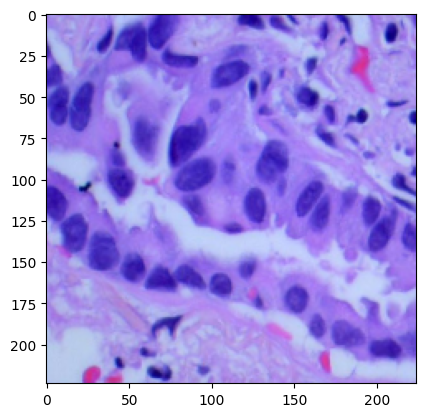

In [58]:
import numpy as np
for images_batch, labels_batch in test_set:
    
    first_image = images_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

1/1 [==============================] - 0s 370ms/step


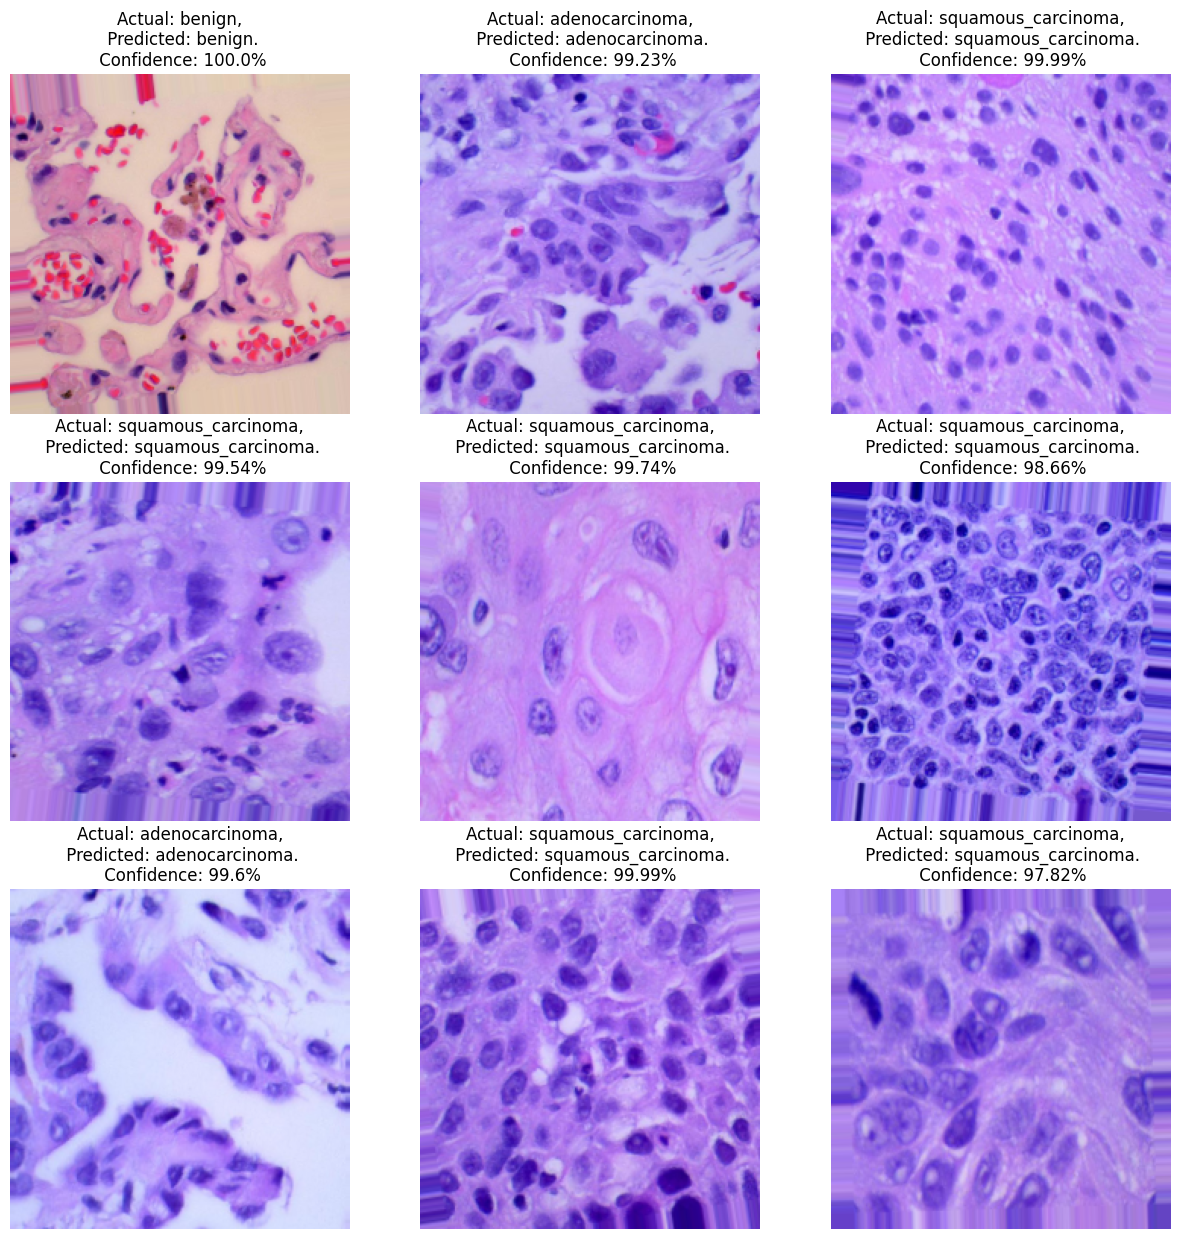

In [59]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Generating predictions...
4/4 [==============================] - 30s 8s/step
Classification Report:
                    precision    recall  f1-score   support

    adenocarcinoma       0.89      0.97      0.93        33
            benign       1.00      1.00      1.00        48
squamous_carcinoma       0.98      0.91      0.95        47

          accuracy                           0.96       128
         macro avg       0.96      0.96      0.96       128
      weighted avg       0.96      0.96      0.96       128

Generating confusion matrix...


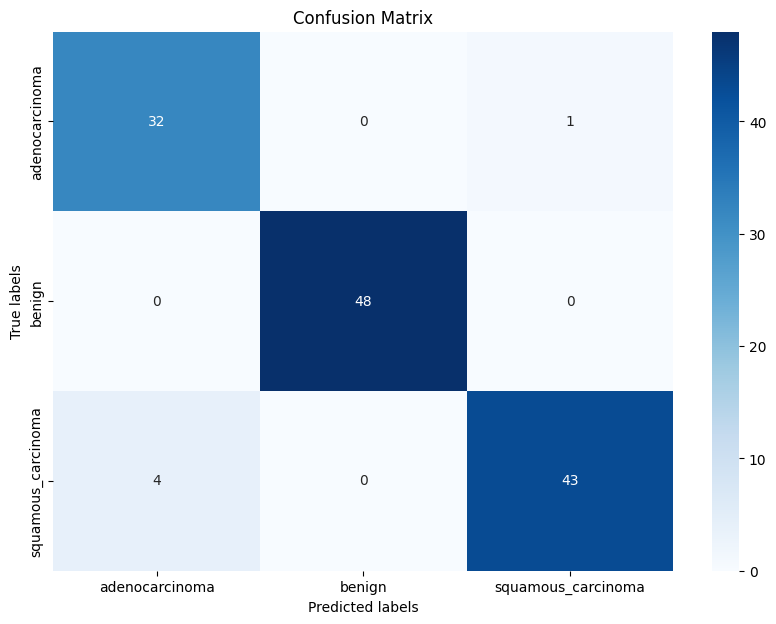

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on a subset of the test set
subset_size = 100  # Adjust the subset size as needed
test_images_subset, test_labels_subset = [], []
for images, labels in test_set:
    if len(test_images_subset) < subset_size:
        test_images_subset.extend(images)
        test_labels_subset.extend(labels)
    else:
        break
test_images_subset = np.array(test_images_subset)
test_labels_subset = np.array(test_labels_subset)

# Generate predictions
print("Generating predictions...")
y_pred_subset = model.predict(test_images_subset)
y_pred_classes_subset = np.argmax(y_pred_subset, axis=1)

# Generate classification report
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']  # Replace with your class names
print("Classification Report:")
print(classification_report(test_labels_subset, y_pred_classes_subset, target_names=class_names))

# Generate confusion matrix
print("Generating confusion matrix...")
cm_subset = confusion_matrix(test_labels_subset, y_pred_classes_subset)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
# Save the plot as an image file
plt.savefig('confusion_matrix.png')
plt.show()